# W207 Final Project Kobe Bryant Shot Selection
### August 21, 2017
### by Michelle Liu, Surya Nimmagadda, Adhaar Gupta


## I. Problem Description

Kobe Bryant, one of the most famous NBA players, was drafted into the NBA at the age of 17. Kobe played his entire 20-year career with the Los Angeles Lakers team, and won five NBA championships with the Lakers. He is an 18-time All-Star, 15-time member of the All-NBA Team, and 12-time member of the All-Defensive team. He led the NBA in scoring during two seasons, and ranks third on the league's all-time regular season scoring and fourth on the all-time postseason scoring list. As a legend, he holds the NBA record for the most seasons playing with one franchise for an entire career.

The Kaggle's challenge is to use 20 years of data on Kobe's swishes and misses to predict which shots will miss and which shots will make the net. 

## II. Introduction

This notebook highlights the exploratory data analysis we did on the raw data, the methods and algorithms we implemented to achive higher accuracy, feature engineering, error analysis, and our results.


In [174]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# General libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SK-learn libraries for learning.
#from sklearn.pipeline import Pipeline
#from sklearn.decomposition import PCA, KernelPCA
from sklearn.cross_validation import KFold, cross_val_score
#from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
#from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn.linear_model import LogisticRegression
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier
#from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#from sklearn.mixture import GMM
#from matplotlib.colors import LogNorm
#from matplotlib.colors import ListedColormap
#import matplotlib.patches as patches
from sklearn.mixture import GaussianMixture
import random
import math

In [175]:
# Reading the raw Data File in a dataframe (Download both train data and sample file)
data = "C:\MIDS\W207\KobeProject\Train_Data.csv"
sample = "C:\MIDS\W207\KobeProject\Sample.csv"

raw = pd.read_csv(data)
sam = pd.read_csv(sample)

In [176]:
#Let's examine the imported data
raw.head(10)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,10/31/2000,LAL @ POR,POR,10


## III. Exploratory Data Analysis & Feature Engineering

After importing the csv file, the team picked out a few interesting features. With our knowledge about basketball and Kobe's NBA career, we decided to look at action type, combined shot type, opponent, period, shot zone basic, shot zone area, shot zone range, loc x, loc y, minutes and seconds remaining, shot distance, playoffs, game date, matchups, and season. The detailed exploratory analysis with each feature is described below.


In [177]:
## Selecting only interesting columns from the dataset
raw = raw[['action_type', 'combined_shot_type', 'loc_x','loc_y','minutes_remaining', 'period','playoffs',\
           'season', 'seconds_remaining', 'shot_distance','shot_type', 'shot_zone_basic', 'shot_zone_area', \
           'shot_zone_range', 'game_date','matchup','opponent','shot_made_flag' ]]

#### 1) Action Type

There are  57 unique action types.



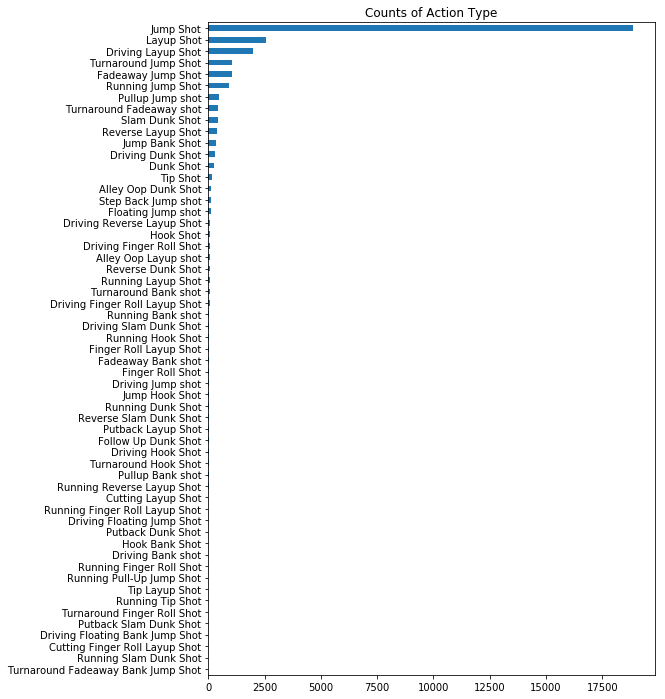

In [178]:
print ("There are ", len(raw.action_type.unique()), "unique action types.\n")
action_type_count = raw['action_type'].value_counts().sort_values()
action_type_count.plot(kind='barh', figsize=(8, 12), title="Counts of Action Type")

In [179]:
# Replace 20 least common action types with value 'Other'
other_action_types = raw['action_type'].value_counts().sort_values().index.values[:20]
raw.loc[raw['action_type'].isin(other_action_types), 'action_type'] = 'Other'

Since there are so many action types that only appear a few times, we decided to bin the 20 least common types into one 'Others' category.

Now there are only 38 unique action types.



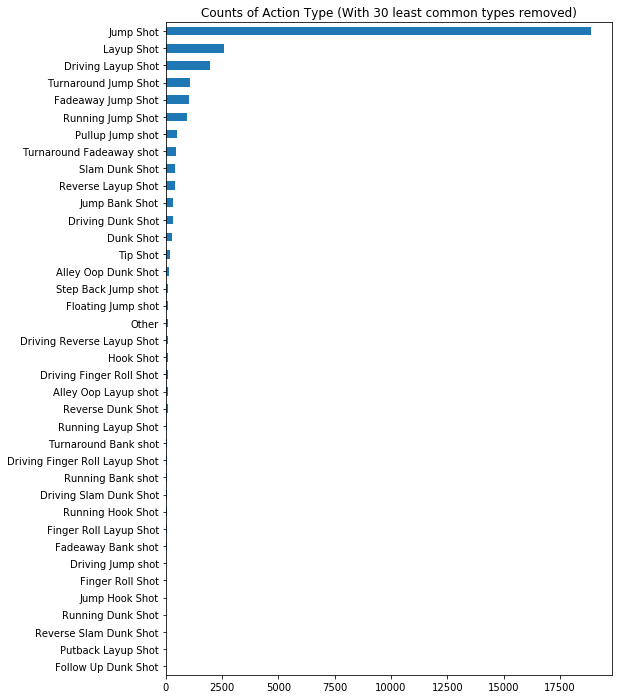

In [180]:
print ("Now there are only", len(raw.action_type.unique()), "unique action types.\n")

action_type_count_others = raw['action_type'].value_counts().sort_values()
action_type_count_others.plot(kind='barh', figsize=(8, 12), title="Counts of Action Type (With 30 least common types removed)")

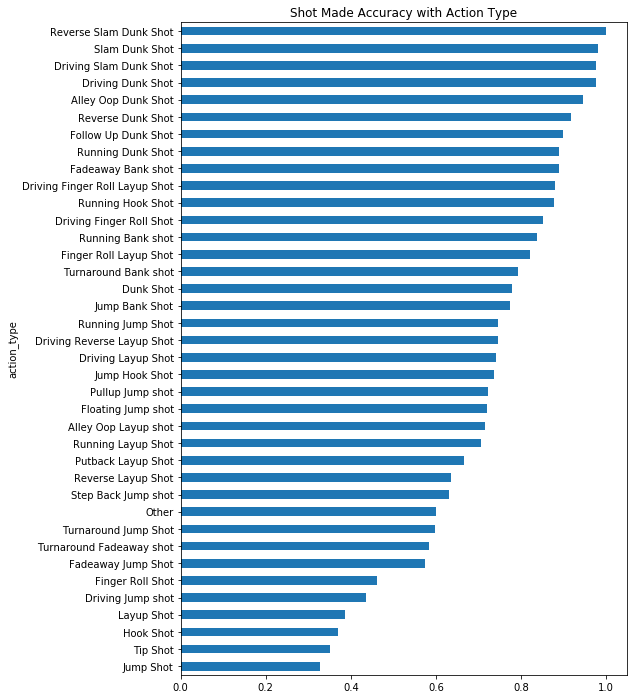

In [181]:
action_type = raw['shot_made_flag'].groupby(raw['action_type']).mean()
action_type.sort_values()
action_type.sort_values().plot(kind='barh', figsize=(8, 12), title="Shot Made Accuracy with Action Type")

From this we can see that action type is correlated to accuracy, certain type of shots have lower accuracy than others.

#### 2) Combined Shot Type

In [182]:
combined_shot_type_count = raw['combined_shot_type'].value_counts().sort_values()
print (combined_shot_type_count)

Bank Shot      141
Hook Shot      153
Tip Shot       184
Dunk          1286
Layup         5448
Jump Shot    23485
Name: combined_shot_type, dtype: int64


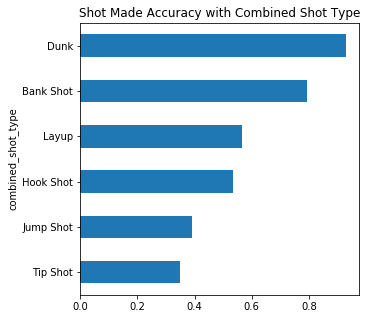

In [183]:
combined_shot_type = raw['shot_made_flag'].groupby(raw['combined_shot_type']).mean()
combined_shot_type.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Combined Shot Type")

From this, it looks like combined shot type is correlated with shot accuracy as well. For example, dunk shot has a very high accuracy. Since there are only 6 unique combined shot type, we did not do any data transformation on this feature.

#### 3) Opponent

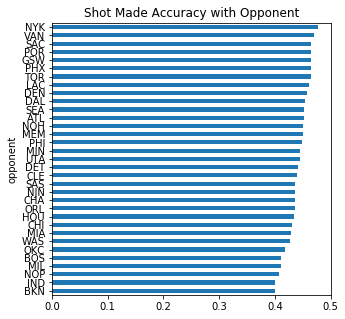

In [184]:
opponent = raw['shot_made_flag'].groupby(raw['opponent']).mean()
opponent.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Opponent")

From this we can tell that Kobe's shot accuracy is slightly influenced by what opponent he was facing.

#### 4) Period

7       7
6      38
5     330
2    6718
4    7260
1    8048
3    8296
Name: period, dtype: int64


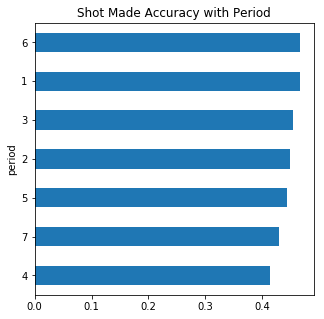

In [185]:
period_count = raw['period'].value_counts().sort_values()
print (period_count)

period = raw['shot_made_flag'].groupby(raw['period']).mean()
period.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Period")

From here, it looks like Kobe is pretty consistent between different periods. Looking at the count, we see that he makes less attempts during second period, most likely resting. Periods 5-7 are overtime, so it makes sense that the count is smaller. 

#### 5) Shot Zone Basic

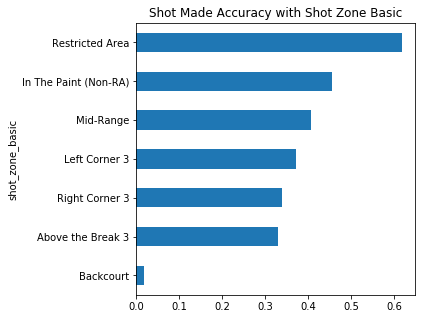

In [186]:
shot_zone_basic = raw['shot_made_flag'].groupby(raw['shot_zone_basic']).mean()
shot_zone_basic.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Shot Zone Basic")

From this, shot zone basic seems correlated with shot accuracy.

#### 6) Shot Zone Area

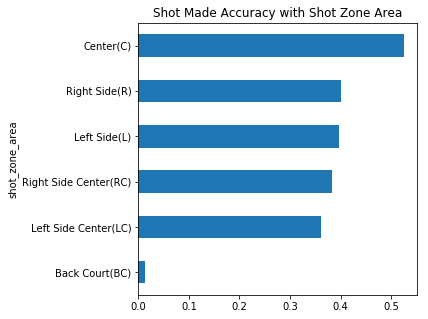

In [187]:
shot_zone_area = raw['shot_made_flag'].groupby(raw['shot_zone_area']).mean()
shot_zone_area.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Shot Zone Area")

From this, we can tell that shot zone area is also correlated with shot accuracy.

#### 7) Shot Zone Range

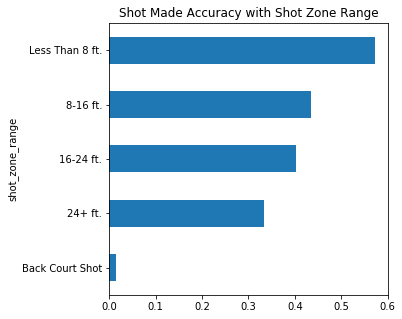

In [188]:
shot_zone_range = raw['shot_made_flag'].groupby(raw['shot_zone_range']).mean()
shot_zone_range.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Shot Zone Range")

From this, we can see that shot zone range is also correlated with accuracy.

#### 8) Loc x, Loc y

Loc x and loc y are linearly related to lat and lon. Thus we decided to drop lat and lon variable and analyze only loc

(-100, 900)

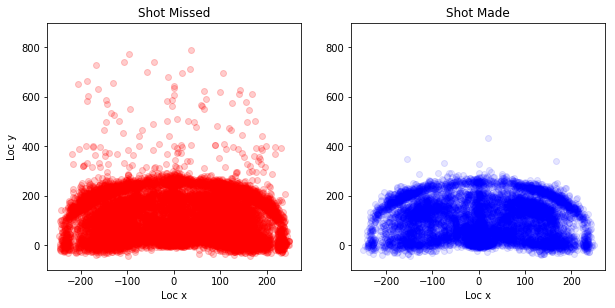

In [189]:
# Ploting Loc x and Loc y along with shot made flag
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.scatter(raw['loc_x'][raw['shot_made_flag']==0], raw['loc_y'][raw['shot_made_flag']==0], c='r',alpha=0.2)
plt.ylabel('Loc y')
plt.xlabel('Loc x')
plt.title('Shot Missed')
plt.ylim(-100, 900)

plt.subplot(2, 2, 2)
plt.scatter(raw['loc_x'][raw['shot_made_flag']==1], raw['loc_y'][raw['shot_made_flag']==1], c='b', alpha=0.1)
plt.xlabel('Loc x')
plt.title('Shot Made')
plt.ylim(-100, 900)

From this graph we can see that 'Loc x' and 'Loc y' are location coordinate on the basketball court. We can see that the location matters when Kobe shoot far away. We decided to group the coordinates into clusters using Gaussian Mixture.

In [190]:
# Transforming loc x and loc y into clusters
gmm_loc = GaussianMixture(n_components=10, covariance_type='full')
gmm_loc.fit(raw.ix[:,['loc_x','loc_y']])
raw['shotLocationCluster'] = gmm_loc.predict(raw.ix[:,['loc_x','loc_y']])

#### 9) Shot Distance

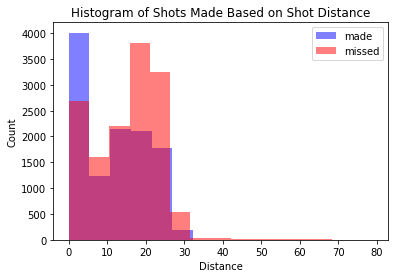

In [191]:
plt.hist(raw['shot_distance'][raw['shot_made_flag']==1], color='blue', alpha=0.5, label='made', bins=8)
plt.hist(raw['shot_distance'][raw['shot_made_flag']==0], color='red', alpha=0.5, label='missed', bins=15)
plt.legend(loc='upper right')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Histogram of Shots Made Based on Shot Distance')

From the histogram, we can see that shot distance is correlated with shot accuracy. 

#### 10) Minutes and Seconds Remaining

Time is given in two parts, minutes remaining and seconds remaining. We combined the two to get the total seconds remaining from the end of period. Kobe is known for attempting shots in the last few seconds of the game. However, these shots tend to be far away from the basket. Therefore we want to see if he is more likely to miss or make those shots.

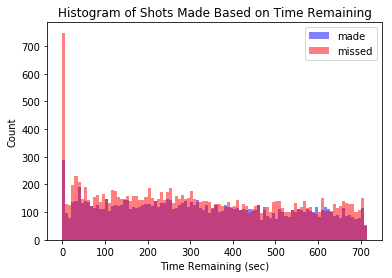

In [192]:
## Transforming time
raw['seconds_from_period_end'] = 60 * raw['minutes_remaining'] + raw['seconds_remaining']
plt.hist(raw['seconds_from_period_end'][raw['shot_made_flag']==1], color='blue', alpha=0.5, label='made', bins=100)
plt.hist(raw['seconds_from_period_end'][raw['shot_made_flag']==0], color='red', alpha=0.5, label='missed', bins=100)
plt.legend(loc='upper right')
plt.xlabel('Time Remaining (sec)')
plt.ylabel('Count')
plt.title('Histogram of Shots Made Based on Time Remaining')

From this we can see that Kobe had a lot of attempts at shooting during the last few seconds of the game, and he missed most of the time. From this, we create a boolean variable for if the shot was made within the last 5 second in the quarter.  

In [193]:
raw['last_5_sec_in_period'] = raw['seconds_from_period_end'] <= 5

#### 11) Season

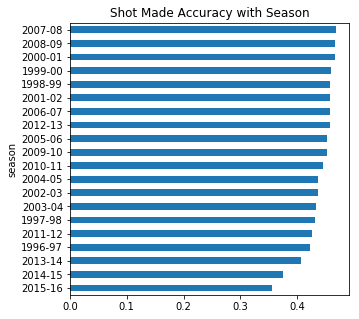

In [194]:
season = raw['shot_made_flag'].groupby(raw['season']).mean()
season.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Season")

From this we can see that Kobe was pretty consistent throughout his career, but has a significant decline after 2013. 

#### 12) Matchup

We transform the matchup variable to a boolean variable to see if the game was a home game or not.

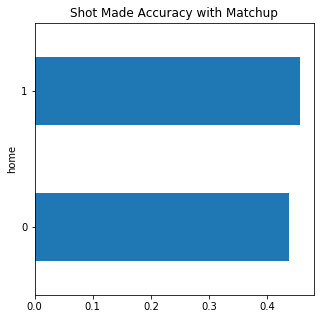

In [195]:
## Matchup - (away/home)
raw['home'] = raw['matchup'].str.contains('vs').astype('int')

home = raw['shot_made_flag'].groupby(raw['home']).mean()
home.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Matchup")

#### 13) Game Date

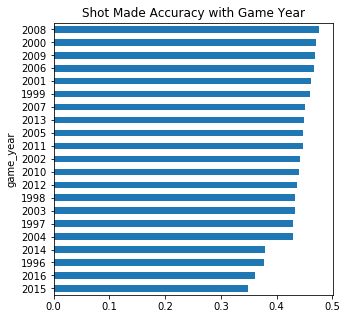

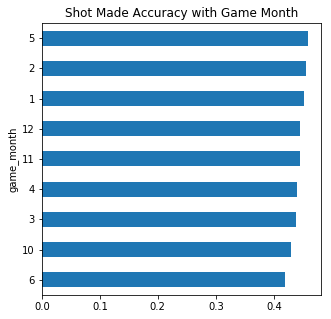

In [196]:
# Game date
raw['game_date'] = pd.to_datetime(raw['game_date'])
raw['game_year'] = raw['game_date'].dt.year
raw['game_month'] = raw['game_date'].dt.month

game_year = raw['shot_made_flag'].groupby(raw['game_year']).mean()
game_year.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Game Year")
plt.figure()
game_month = raw['shot_made_flag'].groupby(raw['game_month']).mean()
game_month.sort_values().plot(kind='barh', figsize=(5, 5), title="Shot Made Accuracy with Game Month")

#### Transforming categorical variables into numerical values

In [198]:
## Transforming categorical data into numerical fields

# Converting to numeric List
action_type_list = list(set(raw["action_type"].tolist()))
raw["action_type_num"] = pd.Series([action_type_list.index(raw["action_type"][i]) for i in range(0, len(raw))])

# Converting to numeric List
combined_shot_type_list = list(set(raw["combined_shot_type"].tolist()))
raw["combined_shot_type_num"] = pd.Series([combined_shot_type_list.index(raw["combined_shot_type"][i]) for i in range(0, len(raw))])

# Converting to numeric List
season_list = list(set(raw["season"].tolist()))
raw["season"] = pd.Series([season_list.index(raw["season"][i]) for i in range(0, len(raw))])

# Converting to numeric List
shot_type_list = list(set(raw["shot_type"].tolist()))
raw["shot_type_num"] = pd.Series([shot_type_list.index(raw["shot_type"][i]) for i in range(0, len(raw))])

# Converting to numeric List
shot_zone_area_list = list(set(raw["shot_zone_area"].tolist()))
raw["shot_zone_area_num"] = pd.Series([shot_zone_area_list.index(raw["shot_zone_area"][i]) for i in range(0, len(raw))])

# Converting to numeric List
shot_zone_basic_list = list(set(raw["shot_zone_basic"].tolist()))
raw["shot_zone_basic_num"] = pd.Series([shot_zone_basic_list.index(raw["shot_zone_basic"][i]) for i in range(0, len(raw))])

# Converting to numeric List
shot_zone_range_list = list(set(raw["shot_zone_range"].tolist()))
raw["shot_zone_range_num"] = pd.Series([shot_zone_range_list.index(raw["shot_zone_range"][i]) for i in range(0, len(raw))])

# Converting to numeric List
opponent_list = list(set(raw["opponent"].tolist()))
raw["opponent_num"] = pd.Series([opponent_list.index(raw["opponent"][i]) for i in range(0, len(raw))])

# Aggregating shot distance
raw["shot_distance"][raw["shot_distance"] > 40] = 40
raw["shot_distance"][(raw["shot_distance"] >= 30) & (raw["shot_distance"] != 40) ] = 30

raw.shape

(30697, 31)

#### Dropping string based categorical Columns

In [199]:
raw.drop('minutes_remaining', 1, inplace=True)
raw.drop('seconds_remaining', 1, inplace=True)
raw.drop('seconds_from_period_end', 1, inplace=True)

raw.drop('matchup', axis=1, inplace=True)
raw.drop('game_date', axis=1, inplace=True)

raw.drop('combined_shot_type', axis=1, inplace=True)
raw.drop('action_type', axis=1, inplace=True)
raw.drop('shot_type', axis=1, inplace=True)
raw.drop('shot_zone_area', axis=1, inplace=True)
raw.drop('shot_zone_range', axis=1, inplace=True)
raw.drop('shot_zone_basic', axis=1, inplace=True)
raw.drop('opponent', axis=1, inplace=True)
raw.drop('loc_x', axis=1, inplace=True)
raw.drop('loc_y', axis=1, inplace=True)

raw.shape

(30697, 17)

## IV. Creating Training, Dev and Test Data Sets 

In [200]:
## Creating the training data set and a testing data set based on the shot made flag availability
#shuffled_raw = raw.sample(frac=1)
df = raw[pd.notnull(raw['shot_made_flag'])]
X = df.drop('shot_made_flag', 1)
y = df['shot_made_flag']
print (X.shape)
print (y.shape)

test = raw[pd.isnull(raw['shot_made_flag'])]
test = test.drop('shot_made_flag', 1)
print(test.shape)
print(raw.shape)

(25697, 16)
(25697,)
(5000, 16)
(30697, 17)


Creating Train and Dev dataset for testing purpose

In [220]:
# Shuffling the RAW File and creating a new dataframe
np.random.seed(42)
shuffled_raw = raw.sample(frac=1)
df_s = shuffled_raw[pd.notnull(shuffled_raw['shot_made_flag'])]

# Extracting the known flags in a new dataframe
X_s = df_s.drop('shot_made_flag', 1)
Y_s = df_s['shot_made_flag']

print(X_s.shape)
print(Y_s.shape)

# Dividing the Data Set into train and test
X_s_train = X_s.iloc[:20000]
Y_s_train = Y_s.iloc[:20000]

X_s_test = X_s.iloc[20000:]
Y_s_test = Y_s.iloc[20000:]

print(X_s_train.shape)
print(X_s_test.shape)

# Converting the test and train dataframes into matrices
train_data = X_s_train.values
train_labels = Y_s_train.values
dev_data = X_s_test.values
dev_labels = Y_s_test.values

(25697, 16)
(25697,)
(20000, 16)
(5697, 16)


## V. Trying with different classifiers

We used the different classifiers we learned throughout the course and use GridSearch to find the best parameters for each. We then calculated the accuracy for each classifier and upload our prediction on Kaggle to get the score.

#### 1. KNN Classifier
Got a Kaggle Score of : 1.74

In [231]:
## KNN classifier

k_values = list(range(1,10))
parameters = {'n_neighbors': k_values}
grid = GridSearchCV(KNeighborsClassifier(),parameters)
grid.fit(train_data, train_labels)
print ('Best KNN accuracy :', grid.best_score_, ' with k= ', grid.best_params_)

knn = KNeighborsClassifier(grid.best_params_['n_neighbors'])
knn.fit(train_data, train_labels)
pred_dev = knn.predict(dev_data)
print ('accuracy with dev data:', np.mean(dev_labels == pred_dev))

Best KNN accuracy : 0.62945  with k=  {'n_neighbors': 8}
accuracy with dev data: 0.635597682991


#### 2. Bernoulli NB Classifier
Got a Kaggle Score of : 0.941

In [203]:
## Bernoulli NB Model

alphas = {'alpha': [0, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
grid = GridSearchCV(BernoulliNB(),alphas)
grid.fit(train_data, train_labels)
print ('Best BernoulliNB score:', grid.best_score_, 'with alpha= ', grid.best_params_)

b_clf = BernoulliNB(alpha=grid.best_params_['alpha'])
b_clf.fit(train_data, train_labels)
pred_dev = b_clf.predict(dev_data)
print ('accuracy with dev data:', np.mean(dev_labels == pred_dev))

Best BernoulliNB score: 0.55445 with alpha=  {'alpha': 0}
accuracy with dev data: 0.551693873969


#### 3. Logistic Regression Model Classifier
Got a Kaggle Score of : 0.68

In [204]:
# Logistic Regression Model

Cs = {'C': [.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 1]}
lg_clf = LogisticRegression(penalty='l2')
grid_search = GridSearchCV(lg_clf, Cs)
grid_search.fit(train_data, train_labels)
print ('Best Logistic regression score:', grid_search.best_score_, 'with C= ', grid_search.best_params_)

lg_clf = LogisticRegression(penalty='l2', C = grid_search.best_params_['C'])
lg_clf.fit(train_data, train_labels)
pred_dev = lg_clf.predict(dev_data)
print ('accuracy with dev data:', np.mean(dev_labels == pred_dev))

Best Logistic regression score: 0.6228 with C=  {'C': 0.5}
accuracy with dev data: 0.625943479024


#### 4. Adaboost Classifier
Got a Kaggle Score of : 0.70

In [205]:
## AdaBoost Classifier

abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50, learning_rate=1)
abc.fit(train_data, train_labels)
pred_dev = abc.predict(dev_data)
print ('AdaBoost Classifier:')
print ('accuracy with dev data:', np.mean(dev_labels == pred_dev))

AdaBoost Classifier:
accuracy with dev data: 0.678251711427


## VI. ERROR ANALYSIS
The following section evaluates the error that the models are making.

In [206]:
## Function to print the Top 5 errors made by the model
def error(z,data,pred_label,true_label):
    
    idx = np.amax(z, axis=1) # Finding the max label probability for each sample in test set
   
    # defining and an empty list and finding the probability of correct class in each document in test set
    x = []
    for i in range(len(pred_label)):
        t = z[i][int(true_label[i])]
        x.append(t)    
    
    # finding R for each document in dev set
    k = idx / x
    
    plt.hist(k[k!=1],50)
    plt.title("Histogram of incorrect R Values")
    plt.xlabel("R Values > 1")
    plt.ylabel("Frequency")
    plt.show()
    
    # displaying the documents with top 5 R's by first find their index from k
    indices = np.argsort(k)[-5:]
    j = 0
    for i in indices:
        print('\nMessage %d -- Predicted label : %s -- Correct label : %s' %(j+1 , pred_label[i], true_label[i]))
        print('Ratio R is %3f' %(k[i]))
        print('The predicted probabilities for the two classes are',z[i])
        print('The test row is given below')
        print(data[i])
        j +=1

#### 1) Logistic Regression Error Analysis
Running the Logistic Regression on the train and test data, we see that most of the errors were made when the prediction was that Kobe would miss the shot, but he actually made it in - a false negative. From looking at the details of the shots that were predicted incorrectly, we believe that these are the outliers during the last 5 seconds of the game. Kobe missed the majority of his long-distance shots at the last few seconds of the game, so the outliers are the shots that he did make. Also the ratio R is between 1 and 2, which implies that the model is moderately incorrect.

R = (maximum predicted probability / predicted probability of the correct label)

Confusion Matrix Below:
[[2598  545]
 [1589  965]]


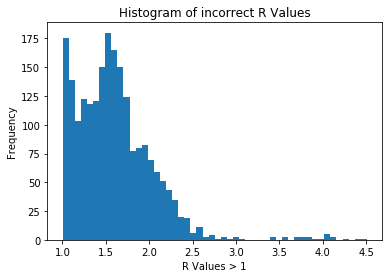


Message 1 -- Predicted label : 0.0 -- Correct label : 1.0
Ratio R is 4.094853
The predicted probabilities for the two classes are [ 0.80372347  0.19627653]
The test row is given below
[4 0 13 25 8 True 0 2004 4 24 3 1 1 0 0 9]

Message 2 -- Predicted label : 0.0 -- Correct label : 1.0
Ratio R is 4.121865
The predicted probabilities for the two classes are [ 0.80475862  0.19524138]
The test row is given below
[1 0 5 30 8 True 1 2001 2 24 3 1 1 0 0 30]

Message 3 -- Predicted label : 0.0 -- Correct label : 1.0
Ratio R is 4.270071
The predicted probabilities for the two classes are [ 0.81024924  0.18975076]
The test row is given below
[4 0 18 26 3 True 0 2010 2 24 3 1 4 0 0 22]

Message 4 -- Predicted label : 0.0 -- Correct label : 1.0
Ratio R is 4.389460
The predicted probabilities for the two classes are [ 0.81445264  0.18554736]
The test row is given below
[3 1 9 30 8 True 0 2009 5 22 3 1 1 0 0 27]

Message 5 -- Predicted label : 0.0 -- Correct label : 1.0
Ratio R is 4.508122
The pred

In [207]:
# LOGISTIC REGRESSION

lr = LogisticRegression(penalty='l2', C=0.3)
lr.fit(train_data,train_labels)
pred = lr.predict(dev_data)

print("Confusion Matrix Below:")
print(metrics.confusion_matrix(y_true=dev_labels,y_pred=pred,labels=[0,1]))

z = lr.predict_proba(dev_data)
error(z,dev_data,pred,dev_labels)

#### 2. Gaussian Mixture Model Error Analysis
For further analysis we took GMM Model with 2 or 3 PCA Components

In [222]:
def gmm_model(train_data, train_labels,test_data, test_labels, pca_comp, gmm_comp, gmm_covariance):
    '''Function to perform the GMM give the test and train data along with GMM parameters'''
    
    # reducing to 2 components using PCA
    pca_mod = PCA(n_components = pca_comp)
    train_data_pca = pca_mod.fit_transform(train_data)
    test_data_pca = pca_mod.transform(test_data)


    ## Creating two list with indexes for each class
    a0 =[]
    a1 =[]
    for idx, elem in enumerate(train_labels):
        if elem == 0:
            a0.append(idx)
        else:
            a1.append(idx)


    # positive GMM

    clf_p = GaussianMixture(n_components=gmm_comp, covariance_type=gmm_covariance,random_state = 42)
    clf_p.fit(train_data_pca[a1])

    # negative GMM
    clf_n = GaussianMixture(n_components=gmm_comp, covariance_type=gmm_covariance,random_state = 42)
    clf_n.fit(train_data_pca[a0])

    # Score samples
    pos = clf_p.score_samples(test_data_pca) 
    neg = clf_n.score_samples(test_data_pca)


#    creating the predicted labels
    pred = []
    for i in range(len(pos)):
        if pos[i] >= neg[i]:
            pred.append(1)
        else:
            pred.append(0)
    
    j=0
    for i in range(len(pred)):
        if pred[i] == test_labels[i]:
            j+=1
    
    print('Accuracy from the Model', j*1.0/len(pred))
    
    pred2 = []
    for i in range(len(pos)):
        if pos[i] >= neg[i]:
            pred2.append(0.6)  ## Arbitrary probability
        else:
            pred2.append(0.4)  ## Arbitrary probability

    pred3 = [np.exp(p) / (np.exp(p) + np.exp(n))  for p,n in zip(pos, neg)]
    
    return pred,pos,pred3,train_data_pca,test_data_pca

In [209]:
def graph2d(data,labels):
    '''Function to plot 2 dimensional graphs'''
    ## Creating two list with indexes for each class
    a0 =[]
    a1 =[]
    for idx, elem in enumerate(labels):
        if elem == 0:
            a0.append(idx)
        else:
            a1.append(idx)

    fig = plt.figure(figsize=(5, 3 ))
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0][a0], data[:, 1][a0], color='r', label='0') # plotting data for class = 0
    ax.scatter(data[:, 0][a1], data[:, 1][a1], color='b', label='1', alpha = 0.5) # plotting data for class = 1
    ax.legend()
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    plt.title('Data with 2-PCA Components')
    plt.show()
    
from mpl_toolkits.mplot3d import Axes3D

def graph3d(train_data, train_labels):
    '''Function to plot 3 dimensional graphs'''
    a0 =[]
    a1 = []
    ## Creating two list with indexes for each class
    for idx, elem in enumerate(train_labels):
        if elem == 0:
            a0.append(idx)
        else:
            a1.append(idx)

    a  = train_data

    fig = plt.figure(figsize=(30, 7))
# First Plot
    ax = fig.add_subplot(131, projection='3d')
    ax.scatter(a[:, 0][a0], a[:, 1][a0], a[:, 2][a0], zdir='z', color='r', label='0',alpha=0.25) # plotting data for class = 0
    ax.scatter(a[:, 0][a1], a[:, 1][a1], a[:, 2][a1], zdir='z', color='b', label='1', alpha=0.25) # plotting data for class = 0
    ax.legend()
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    plt.title('Data with 3-PCA Components')
    
#   Second Plot
    ax = fig.add_subplot(132, projection='3d')
    ax.scatter(a[:, 2][a0], a[:, 0][a0], a[:, 1][a0], zdir='z', color='r', label='0',alpha=0.25) # plotting data for class = 0
    ax.scatter(a[:, 2][a1], a[:, 0][a1], a[:, 1][a1], zdir='z', color='b', label='1', alpha=0.25) # plotting data for class = 0
    ax.legend()
    ax.set_xlabel('Component 3')
    ax.set_ylabel('Component 1')
    ax.set_zlabel('Component 2')
    plt.title('Data with 3-PCA Components')

#  Third Plot
    ax = fig.add_subplot(133, projection='3d')
    ax.scatter(a[:, 1][a0], a[:, 2][a0], a[:, 0][a0], zdir='z', color='r', label='0',alpha=0.25) # plotting data for class = 0
    ax.scatter(a[:, 1][a1], a[:, 2][a1], a[:, 0][a1], zdir='z', color='b', label='1', alpha=0.25) # plotting data for class = 0
    plt.legend()
    ax.set_xlabel('Component 2')
    ax.set_ylabel('Component 3')
    ax.set_zlabel('Component 1')
    plt.title('Data with 3-PCA Components')
    plt.show()

##### GMM with 2 PCA Components
Looking the graphs below 2 PCA componants have a lot of overlap and thus we decided to try more PCA Componants

Accuracy from the Model 0.6131297173951202
Plot of Train Data


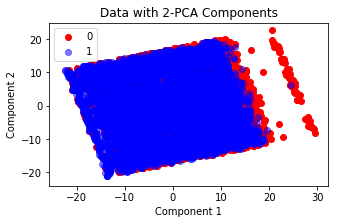


Plot of Test Data


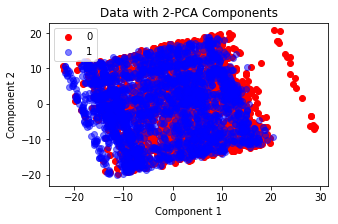

In [210]:
pred_labels,pos_proba,pred_proba,train_data_pca,test_data_pca = gmm_model(train_data, train_labels,dev_data, dev_labels,2,5,"full")

print("Plot of Train Data")
graph2d(train_data_pca,train_labels)
print("\nPlot of Test Data")
graph2d(test_data_pca,dev_labels)

##### GMM with 3 PCA Components

Accuracy from the Model 0.6291030366859751
Train Data Visualization


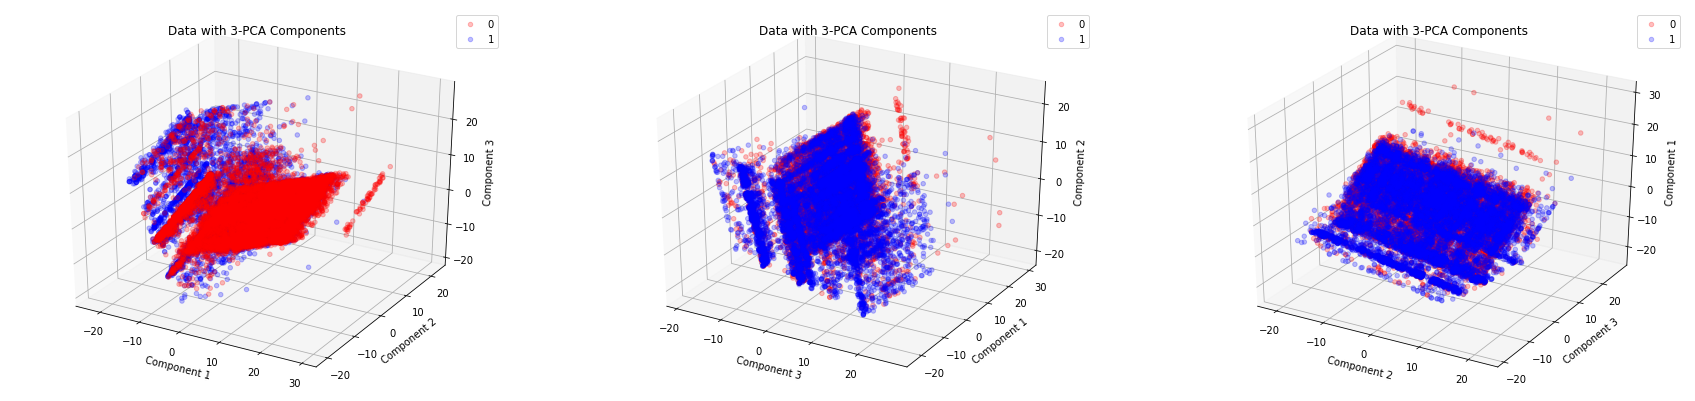


Test Data Visualization


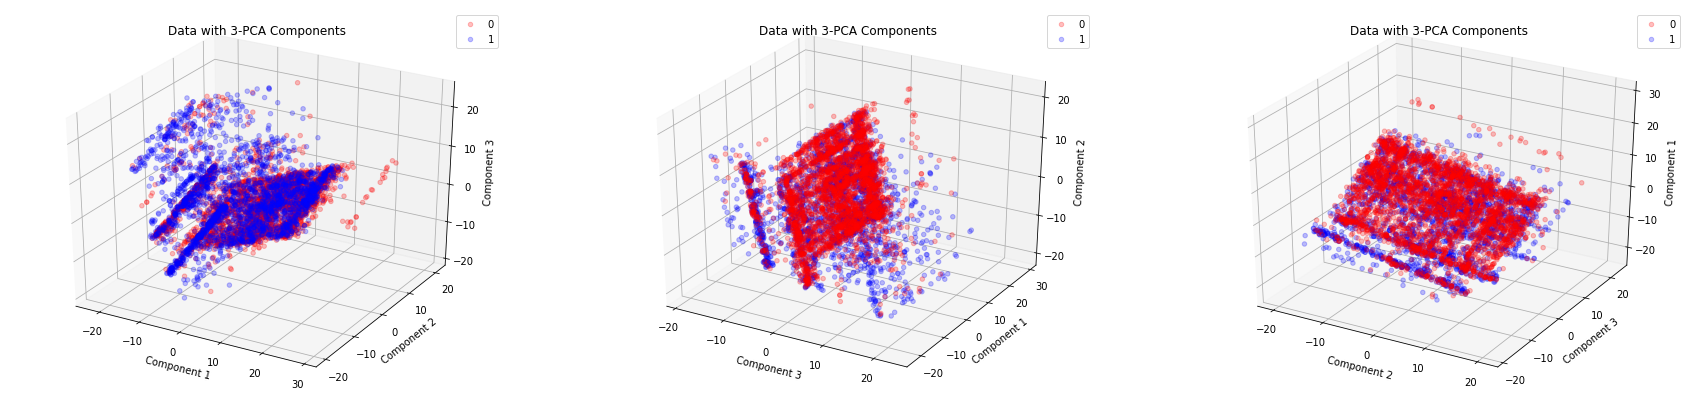

In [211]:
pred_labels,pos_proba,pred_proba,train_data_pca,test_data_pca = gmm_model(train_data, train_labels,dev_data, dev_labels,3,5,"full")

print("Train Data Visualization")
graph3d(train_data_pca, train_labels)
print("\nTest Data Visualization")
graph3d(test_data_pca, dev_labels)

Post a few iterations we settled with 3-PCA Component and  5-GMM full model parameters.

## VII. Principal Component Analysis

In the training set, some of the data points have high shot probability of either being in or out. In some cases the probability is 100%. We decided to take PCA and experiment with multiple component settings to achieve a higher accuracy and to avoid overfitting.

In [219]:
pca_mod = PCA(n_components = 10,random_state=1)
train_data_2d = pca_mod.fit_transform(X)
test_data_2d = pca_mod.transform(test)
print(np.cumsum(pca_mod.explained_variance_ratio_))

[ 0.29672806  0.5752178   0.69325838  0.8037866   0.87926274  0.93569227
  0.96479981  0.98733443  0.99231972  0.99664424]


Though only 70% of the variance is explained by first 3 components of PCA it gave us the best accuracy

## VIII. Final Model 
Our Final Model is GMM with 5 components and covariance type as 'FULL'. We used 3 PCA components of the data to achieve an Kaggle Score of - 0.64657

In [230]:
pred_labels,pos_proba,pred_proba,train_data_pca,test_data_pca = gmm_model(X, y,test, np.ones(len(test)),3,5,"full")
print("Ignore the Accuracy score")
print(pred_proba)

Accuracy from the Model 0.4008
Ignore the Accuracy score
[0.3957029159630403, 0.252608092670282, 0.63949464576485127, 0.64053972378564861, 0.45030814975116545, 0.45139423655683009, 0.65819697298474189, 0.65819697298474189, 0.92455919282341281, 0.44553310984480515, 0.77787993963251134, 0.44750301068666815, 0.4239318913696738, 0.42663281623326482, 0.33287460878608582, 0.37346474628109128, 0.42608367001640757, 0.30544398533992911, 0.23693059141371312, 0.64300857596597738, 0.64388822725265193, 0.37104600986500802, 0.38375813368111306, 0.41742194944765576, 0.7205640688662277, 0.51208312249212962, 0.2759952388392769, 0.48503379255451884, 0.65113309815444764, 0.44197958577587021, 0.65113309815444764, 0.83096620466607585, 0.76086000713549162, 0.97214147579902266, 0.45287066521972003, 0.87785921301212433, 0.45851667571020899, 0.65071142489965139, 0.43263495500715493, 0.46073864024405414, 0.45814008825745911, 0.48102379417871599, 0.97231085837680598, 0.39586969429851332, 0.39586969429851332, 0.3

Creating and submitting the file on Kaggle

In [229]:
## Creating the file to be submitted
sam['shot_made_flag'] = pred_proba
sam.to_csv("C:\MIDS\W207\KobeProject\submission_gmm5_full.csv", index=False)

###### Final Kaggle Score  - 0.64657